# Introduction

The goal of this guided project is to clean and then analyse data about from two Australian government departments to identify the reasons for resignations. Data will be analysed for employees from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

Although these datasets contain similar information for employees from each department, the method of recording and/or reporting them is different. The datasets will therefore need to be standardized before being combined for comparison.

The instruction for this project is to assume the role of data analyst and pretend that stakeholders would like answers to the following questions
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


The data for the DETE survey can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the data for the TAFE is available [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). 

In [1]:
#Import libraries and read data from csv files
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete-exit-survey.csv')
tafe_survey = pd.read_csv('tafe-exit-survey.csv', encoding = 'Latin-1')

# Preview datasets
The cells below are used to briefly explore each dataset and the columns that are stored in each. 

In [2]:
#To avoid compressed output, set pandas to show all columns
pd.options.display.max_columns = 150

In [3]:
#Print information on columns of DETE survey and preview first 5 rows
print("The DETE survey has ", len(dete_survey.columns)," columns\n")
print("Information on the DETE survey data:\n")
dete_survey.info()
dete_survey.head()

The DETE survey has  56  columns

Information on the DETE survey data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissat

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
#Print information on columns of TAFE survey and preview first 5 rows
print("The TAFE survey has ", len(tafe_survey.columns)," columns\n")
print("Information on the TATE survey data:\n")
tafe_survey.info()
tafe_survey.head()

The TAFE survey has  72  columns

Information on the TATE survey data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                      

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

# Observations
The following is observed from the information printed above:
- The DATE survey has 56 columns and the TAFE has 72. Many of these columns will not be useful in this analysis and should be removed.
- Some (if not all) null values in the DATE survey were entered as "Not Stated". Entries containing this text should be considered as null or NaN
- Some columns contain duplicate information that was just entered in a different format. For example, the DETE survey has two "Work life balance" columns. In one of these, data is entered as "True" or "False" whilst in the other it is indicated using a letter e.g. "A", "N", "D" etc. The correlation between these values should be determined before any columns are removed.
- There are multiple columns which indicate that an employee resigned due to some type of dissatisfaction.

In [5]:
#Store a new version of the dete_survey csv that treats cells containg "Not Started" text as null values
dete_survey = pd.read_csv('dete-exit-survey.csv', na_values='Not Stated')

#Print the first 5 rows to confirm that "NaN" appears in place of "Not Started"
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


# Remove Columns
Columns that are either duplicated or not required for this analysis can be removed from the dataset to reduce its size. This can be done using the DataFrame.drop method. The columns to be dropped for each dataset were specified in the project guide.

In [6]:
#Remove unnecessary columns from each dataset and store as new dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

dete_columns = list(dete_survey.columns)
dete_updated_columns = list(dete_survey_updated.columns)

tafe_columns = list(tafe_survey.columns)
tafe_updated_columns = list(tafe_survey_updated.columns)

#Print columns that were removed from each dataset
print("Columns removed from DETE survey dataframe:\n")
for i in dete_columns:
    if not i in dete_updated_columns:
        print(i)
print("=======================================")       
print("\nColumns removed from TAFE survey dataframe:\n")
for i in tafe_columns:
    if not i in tafe_updated_columns:
        print(i)

Columns removed from DETE survey dataframe:

Professional Development
Opportunities for promotion
Staff morale
Workplace issue
Physical environment
Worklife balance
Stress and pressure support
Performance of supervisor
Peer support
Initiative
Skills
Coach
Career Aspirations
Feedback
Further PD
Communication
My say
Information
Kept informed
Wellness programs
Health & Safety

Columns removed from TAFE survey dataframe:

Main Factor.     Which of these was the main factor for leaving?
InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction
InstituteViews. Topic:2. I was given access to skills training to help me do my job better
InstituteViews. Topic:3. I was given adequate opportunities for personal development
InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%
InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had
InstituteViews. Topic:6. The organisation recognised w

# Rename columns in DETE dataset
As part of the preparation to combine the datasets, the names of the columns in each dataset must be standardized. This is done using the following steps:
- Remove leading and/or trailing white space from the strings
- Convert the entire string to lower case letters
- Replace spaces with underscores

These are all done in one step using method chaining

In [7]:
# Remove white space, convert to lower case and replace spaces with underscores for all column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check updated column names
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


# Rename columns in TAFE dataset
The column names in the TAFE dataset must now be modified to match those in the DETE dataset. 

The changes made in this step are outlined below. Note the format is as follows: 'current name' : 'new name'

- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'


In [8]:
#Define dictionary of current and new names for appropriate columns
col_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 
             'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
             'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

#Rename columns in TAFE survey to match DETE column names
tafe_survey_updated = tafe_survey_updated.rename(col_names, axis = 1)

#Check columns to see that updates were made correctly
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')


# Check current state of each dataset:
The first 5 rows of each dataset are printed below to investigate how close we are to being able to combine the datasets and identify what modifications still need to be made

In [9]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Addiontal data cleaning

One of the aims of this analysis is to identify whether employees who have worked at the institutes for short and long periods of time are resigning due to some kind of dissatisfaction. The employees that left the company due to resignation therefore need to be isolated from the 'separationtype' columns of each dataset.

The string 'Resignation' appears in the TAFE survey while there are multiple separation types containing the string 'Resignation' in the DETE survey including:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

All of these types will need to be included when isolating employees that resigned.

In [11]:
#Review number of unique values in 'separationtype' column of each dataset
print('Resons for resignation in DETE survey:\n')
print(dete_survey_updated['separationtype'].value_counts())

print('\nResons for resignation in TAFE survey:\n')
print(tafe_survey_updated['separationtype'].value_counts())

Resons for resignation in DETE survey:

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resons for resignation in TAFE survey:

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
#Change names of all entries containing "Resignation" as part of the separation type 
#in the DETE survey to equal "Resignation" only

#First split strings on hyphens since a hyphen follows 'Resignation' in all cases
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-')

#Then isoltate only first entry of each list in separation type column
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str[0]

In [13]:
#Select only rows with "Resignation" indicated in separation type column

dete_resigned = dete_survey_updated[dete_survey_updated['separationtype'] == "Resignation"].copy()
tafe_resigned = tafe_survey_updated[tafe_survey_updated['separationtype'] == "Resignation"].copy()

To remove some potential inconcistency in the data, the cease_date and dete_start_date columns will be analysed to make sure the data contained in them makes sense.

The cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment. It therefore wouldn't make sense if any of these values were after the current year. Additionally, it is unlikely that any employee would have started work before around 1940 since most people start work in their early twenties. If the start date was before 1940 and the employee has no indicated cease date it would imply the person is currently close to 100 and still working.

If there are very few rows that meet either of the criteria above, they can be removed and we can continue. If there are many rows, we may need to question the validity of this dataset.

In [14]:
# Check the unique values for each of the 3 relevant columns
print("Unique values in DETE 'cease_date' column:\n")
print(dete_resigned['cease_date'].value_counts())

print("\nUnique values in DETE 'dete_start_date' column:\n")
print(dete_resigned['dete_start_date'].value_counts())

print("\nUnique values in TAFE 'cease_date' column:\n")
print(tafe_resigned['cease_date'].value_counts())

Unique values in DETE 'cease_date' column:

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

Unique values in DETE 'dete_start_date' column:

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Unique values in TAFE 'cease_date' column:

2011.0    116
2012.0 

There are a range of formats entered for the dates of the cease_date column in the DETE dataset. Lucklily, the date is always separated by a '/' character and the year is always last. The year can therefore be isolated easily. This is done in the cell below.

In [15]:
#Extract year from DETE cease_date column and convert the string to the same format as the 
#corresponding column in the TAFE dataset (float)

dete_resigned['cease_date'] = dete_resigned['cease_date'].str.split('/').str[-1]
dete_resigned['cease_date'] = dete_resigned['cease_date'].astype('float')

#Check that isolation of year and converstion of datatype has worked
print("Unique values in DETE 'cease_date' column:\n")
dete_resigned['cease_date'].value_counts()

Unique values in DETE 'cease_date' column:



2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

# Analysis of years

There don't appear to be any logic errors with the start or cease years in the datasets so no additional action is required.

# Investigate years of service

To answer the question regarding resignation due to dissatisfaction for employees who have worked for the institues for a short period of time vs those that have work for a longer period, it is necessary to assess the length of time an employee spent in a workplace.

The TAFE dataset already contains a column called 'institue_servce' which indicates the number of years an employee worked for the institute so no action is required for that dataset. A corresponding column will need to be created for the DETE dataset using the dete_start_date and cease_date columns.

In [16]:
#Create 'institue_servce' column in dete_resigned
dete_resigned['institute_service'] = dete_resigned['cease_date'] - dete_resigned['dete_start_date']

# Identify dissatisfied employees

Now that we have the length of service for each employee in the TAFE and DETE datasets, we can analyze how many of them resigned due to dissatisfaction. The columns that exist in each dataset are repeated below to decide which to use when identifying dissatisfied employees

In [17]:
#Review columns containted in each datased
print('Columns in DETE survey:\n')
print(dete_survey_updated.columns)

print('\nColumns in TAFE survey:\n')
print(tafe_survey_updated.columns)

Columns in DETE survey:

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Columns in TAFE survey:

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       

The following columns will be used to categorize employees as 'dissatisfied':

From DETE survey:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

From TAFE survey:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

### Create column of employees who resigned due to dissatisfaction

A new column will now be created for each dataset below indicating whether or not the employee was dissatisfied. If any of the columns above contain a value that indicates the employee was dissatisfied (for any reason) the new column will contain "True". If none indicate dissatisfaction, it will contain "False". If dissatisfaction cannot be determined due to null/missing values, the new column will contain contain "NaN".

Let's first check the unique values that exist in the appropriate TAFE survey columns:

In [18]:
#Check number of unique values for 'Contributing Factors. Dissatisfaction'
print(tafe_resigned['Contributing Factors. Dissatisfaction'].value_counts(dropna = False))
print("===========================================================")

#Check number of unique values for 'Contributing Factors. Job Dissatisfaction'
print(tafe_resigned['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


If an employee confirmed that "Dissatisfaction" or "Job Dissatisfaction" were contributing factors to their resignation, this text is contained in the appropriate contributing factors column. If those were not contributing factos, a '-' character is stored for that entry. If there is no data, "NaN" is stored in the appropriate column for that entry.

A function to update the values to either True, False or NaN can be defined with this knowledge:

In [19]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
#Create new column for identifying dissatisfied employees in TAFE dataset using update_vals function
#Any function used to store 'True' in new column if true returned from any dissatisfaction-type column
tafe_resigned['dissatisfied'] = tafe_resigned[['Contributing Factors. Dissatisfaction',
                                               'Contributing Factors. Job Dissatisfaction']
                                             ].applymap(update_vals).any(1, skipna=False)

#Copy result to avoid SettingWithCopy Warning
tafe_resigned_updated = tafe_resigned.copy()

#Check first 10 rows to confirm function has worked
tafe_resigned_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service,dissatisfied
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [20]:
#Repeat above exercise for DETE dataset

#Create new column for identifying dissatisfied employees in TAFE dataset using update_vals function
#Any function used to store 'True' in new column if true returned from any dissatisfaction-type column
dete_resigned['dissatisfied'] = dete_resigned[['job_dissatisfaction','dissatisfaction_with_the_department',
                                               'physical_work_environment','lack_of_recognition','lack_of_job_security',
                                               'work_location','employment_conditions','work_life_balance',
                                               'workload']].applymap(update_vals).any(1, skipna=False)

#Copy result to avoid SettingWithCopy Warning
dete_resigned_updated = dete_resigned.copy()

#Check first 10 rows to confirm function has worked

dete_resigned_updated.head(10)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
12,13,Resignation,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,True
14,15,Resignation,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True
16,17,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True
20,21,Resignation,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,True
21,22,Resignation,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,True


# Ready to combine!

The datasets have now been cleaned and modified to a point that they are ready to be combined. The end goal is to aggregate based on the institue_service column, so this should be remembered when combining the data.

In [21]:
#Add institue to each dataset so that the origin of its data is clear
dete_resigned_updated['institute'] = 'DETE'
tafe_resigned_updated['institute'] = 'TAFE'

#Combine dataframes by concatenation
#sort = False passed to remove FutureWarning message
combined = pd.concat([dete_resigned_updated,tafe_resigned_updated], ignore_index = True, sort = False)

#Columns with too few non-null values should be dropped to reduce the size of the dataset.
#First check number ofnull values in each column
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
Classification.     Classification                     290
gender                                                 302
age                                                    3

In [22]:
#Drop columns with fewer than 500 non-null values since these are no longer relevant to analysis
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [23]:
# Check the unique values that exist in institute_service column
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
14.0                   6
22.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


# Clean institute_service column

The institute_service column containts values in different forms. The institute_service column was created for the DETE survey during this project but already existed in the TAFE survey at the beginning. The values for the institute_service column in the TAFE survey have been recorded as ranges so these will need to be simplified 

These can be simplified according to recommendations in [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which argues that understanding employee's needs according to career stage instead of age is more effective.

Years of service will be catagorized into the following categories:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [24]:
#Use regex characters to extract only numbers from institue_service column
#str.extract(\d+) results in value being isolated to all digits before a non-digit character
#i.e. 5-7 would be isolated to 5
combined_updated['institute_service'] = combined['institute_service'].astype('str').str.extract(r'(\d+)')

#Check values have updated
combined_updated['institute_service'].value_counts(dropna=False)

1      159
NaN     88
3       83
5       56
7       34
11      30
0       20
6       17
20      17
4       16
9       14
2       14
13       8
8        8
15       7
17       6
22       6
12       6
10       6
14       6
16       5
18       5
24       4
23       4
39       3
19       3
21       3
32       3
36       2
26       2
25       2
28       2
30       2
38       1
29       1
35       1
33       1
42       1
49       1
41       1
31       1
34       1
27       1
Name: institute_service, dtype: int64

In [25]:
#Convert numbers in institute_service to float to categorize using numerical comparators
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

In [26]:
#Function to map each year value to one of the groups defined above
def mapping(x):
    if x < 3:
        return "New"
    elif 3 <= x < 6:
        return "Experienced"
    elif 7 <= x <= 10:
        return "Established"
    elif x >= 11:
        return "Veteran"
    elif pd.isnull(x):
        return np.nan
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(mapping)

In [27]:
#Preview current status of combined_update dataframe
combined_updated.head(10)

,id,separationtype,cease_date,institute_service,dissatisfied,institute,service_cat
0,4,Resignation,2012.0,7.0,True,DETE,Established
1,6,Resignation,2012.0,18.0,True,DETE,Veteran
2,9,Resignation,2012.0,3.0,True,DETE,Experienced
3,10,Resignation,2012.0,15.0,True,DETE,Veteran
4,12,Resignation,2012.0,3.0,True,DETE,Experienced
5,13,Resignation,2012.0,14.0,True,DETE,Veteran
6,15,Resignation,2012.0,5.0,True,DETE,Experienced
7,17,Resignation,2012.0,NaN,True,DETE,NaN
8,21,Resignation,2012.0,30.0,True,DETE,Veteran
9,22,Resignation,2012.0,32.0,True,DETE,Veteran


# Analyse resignations due to dissatisfaction
The 'dissatisfied' column was created in a previous block to assess whether employee that resigned did so due to dissatisfaction or not. If the employee resigned due to dissatisfaction, the value 'True' was stored in this column. If he/she retired for any other reason, 'False' was stored for that employee. If the reason could not be determined due to null values, 'NaN' was assigned for that employee.

Let's now asses the number of each of these values in the 'dissatisfied' column

In [28]:
#Count number of True, False and NA values in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna = False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

NaN values will not be useful for further analysis. Since 'True' exists in the dissatisfied column nearly twice as regularly as 'False', let's assume that NaN dissatisfaction values are True. 

In [34]:
#Replace NaN with most common value. In this case, the most common value is 'True'
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)

#Check unique values again.
combined_updated['dissatisfied'].value_counts(dropna = False)

True     410
False    241
Name: dissatisfied, dtype: int64

The number of workers with various levels of experience who resigned due to dissatisfaction can now be tabulated. This is performed below using a pivot table

In [44]:
#Aggregate data based on service_cat column using a pivot table
#Values sorted by increasing percentage of dissatisfaction
pct_dissatisfied = (combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat')*100).sort_values('dissatisfied')
pct_dissatisfied

,dissatisfied
service_cat,
New,47.668394
Experienced,53.548387
Established,77.419355
Veteran,95.283019


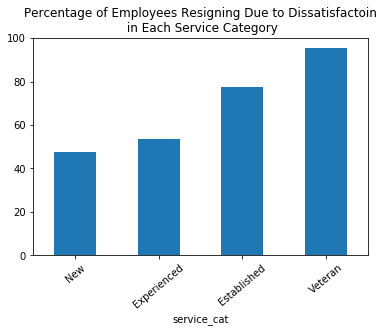

In [46]:
#Plot results
%matplotlib inline
pct_dissatisfied.plot(kind = 'bar', rot = 40, legend = False, title = "Percentage of Employees Resigning Due to Dissatisfactoin\n in Each Service Category")

# Conclusion
---
The reason for DETE and TAFE employee resignations was successfully analysed during this project. A significant amount of data cleaning was required to reach a point where each dataset contained the required columns so that the datasets could be combined or analysis. Once combined, the number and percentage of employees that resigned due to dissatisfaction was determined.

Employees who resigned due to dissatisfaction were categorised by their length of service (experience) to answer the following question: 
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

The experience categories used for this analysis are shown in the table below

|Service Category|Experience|
|---|---|
|New|Less than 3 years 
|Established|Between 3 and 6 years
|Experienced|Between 7 and 10 years
|Veteran|11 or More years|

The chart above indicates that employees with 7 or more years of experience are more likely to resign due to dissatisfaction than less experienced employees. This is especially true for veteran employees as 95% of them who retired did so due to some kind of dissatisfaction
